### Outlier?
an outlier is an observation which is drastically deviated from all the other observations.
Outliers are good and bad according to the problem statement
<p> if we need to find fraud from a credit card then the outliers are necessary.
    for finding the mean of weights an outlier is not good.</p>

## Normal Distribution removing Outliers using z-score
Normal Distribution is bell shaped distribution where center lies at the mean, and also that most of the data is clustered around the center.
##### 68% data lies between mean + SD and mean - SD
##### 95% data lies between mean + 2SD and mean - 2SD
##### 99.7% data lies between mean + 3SD and mean - 3SD
The values which lies outside 3SD they are outliers

In [4]:
import numpy as np

# Generate example data
data = np.array([23, 25, 22, 27, 21, 24, 26, 100, 23, 28, 22, 29])

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Set Z-score threshold
z_threshold = 2

# Calculate Z-scores
z_scores = [(x - mean) / std_dev for x in data]

# Identify outliers
outliers = [data[i] for i, z in enumerate(z_scores) if abs(z) > z_threshold]

print("Original Data:", data)
print("Outliers detected using Z-score:", outliers)


Original Data: [ 23  25  22  27  21  24  26 100  23  28  22  29]
Outliers detected using Z-score: [100]


## Skewed Distribution using InterQurtile Range
Qurtiles : Three points which divide the total data into 4 equal parts when it has been arranged in an order
##### Q1 : 25% smallar on 
##### Q2 : 50% smallar on // median
##### Q3 : 75% smallar on 

### IQR = Q3-Q1
IQR is the data range which consists of the middle 50% of the entries
#### Values which are below Q1 - 1.5IQR or above Q3 + 1.5 IQR are outliers

In [5]:
import numpy as np

# Generate example data
data = np.array([23, 25, 22, 27, 21, 24, 26, 100, 23, 28, 22, 29])

# Calculate first and third quartiles
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

# Calculate the IQR
iqr = q3 - q1

# Set IQR multiplier
iqr_multiplier = 1.5

# Define lower and upper bounds
lower_bound = q1 - iqr_multiplier * iqr
upper_bound = q3 + iqr_multiplier * iqr

# Identify outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]

print("Original Data:", data)
print("Outliers detected using IQR:", outliers)


Original Data: [ 23  25  22  27  21  24  26 100  23  28  22  29]
Outliers detected using IQR: [100]


<Axes: >

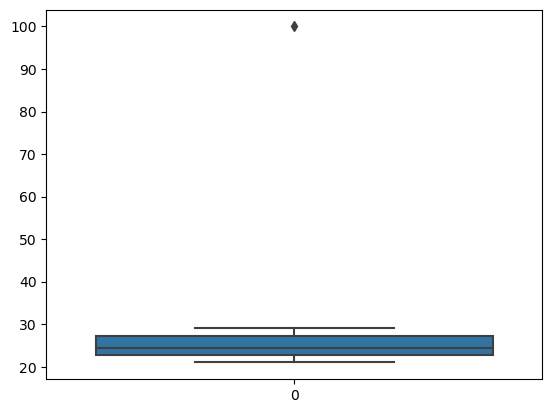

In [7]:
import seaborn as sns
sns.boxplot(data) #box plot is used to see the outlier

### Removing using Percentiles
Percentiles are a measure that indicates a specific value below which a given percentage of observations fall. For instance, the 25th percentile (Q1) indicates the value below which 25% of the data points lie.

In [8]:
import numpy as np

# Generate example data
data = np.array([23, 25, 22, 27, 21, 24, 26, 100, 23, 28, 22, 29])

# Define percentiles
percentile_lower = 10
percentile_upper = 90

# Calculate the percentile values
lower_bound = np.percentile(data, percentile_lower)
upper_bound = np.percentile(data, percentile_upper)

# Identify outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]

print("Original Data:", data)
print("Outliers detected using Percentiles:", outliers)


Original Data: [ 23  25  22  27  21  24  26 100  23  28  22  29]
Outliers detected using Percentiles: [21, 100, 29]


## Correcton of Datatype

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("../AB_NYC_2019.csv")

In [11]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [13]:
# here id column is not required in int
df["id"] = df["id"].astype("str")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  object 
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [15]:
df["host_id"] = df["host_id"].astype("str")

In [17]:
df["host_id"].dtype

dtype('O')

In [18]:
df["last_review"] = pd.to_datetime(df["last_review"])

In [20]:
df["last_review"].dtype

dtype('<M8[ns]')